In [1]:
#library(corrplot)
library(data.table)
library(lubridate)
library(ggplot2)
library(reshape2)
library(scales)
library(zoo)
library(plyr)
library(readr)
library(stats)
library(quantmod)
library(dplyr)
library(readxl)
library(ggplot2)
library(tidyverse)
library(data.table)
library(lubridate)
library(reshape2)
library(scales)
library(zoo)
library(plyr)
library(readr)
library(lubridate)
library(reshape2)
library(scales)
library(broom)
invisible(1:13) # hides it

install.packages('patchwork')

library(patchwork)


Attaching package: ‘lubridate’

The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following object is masked from ‘package:base’:

    date

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘reshape2’

The following objects are masked from ‘package:data.table’:

    dcast, melt


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘plyr’

The following object is masked from ‘package:lubridate’:

    here


Attaching package: ‘readr’

The following object is masked from ‘package:scales’:

    col_factor

Loading required package: xts
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Attaching package: ‘xts’

The following objects are masked from ‘package:data.table’:

   

In [2]:
fuk<- read.csv("Exp_data_fuk.csv")

In [97]:
head(fuk)


fukl <- gather(fuk, Source, Value, PV:Load)
head(fukl)

fukl$Source <- reorder(fukl$Source, fukl$Value, function(x) -max(x) )

Hr,PV,Batt,Wind,Load,City,Weather
1,0,0.0000,0.0000,60.7566,Fukuoka,Windy
2,0,-20.9576,0.0040,14.9876,Fukuoka,Windy
3,0,-7.2501,11.4106,11.8716,Fukuoka,Windy
4,0,4.8005,23.8844,11.8132,Fukuoka,Windy
5,0,5.3558,26.2239,12.2640,Fukuoka,Windy
6,0,11.7518,34.2094,14.0574,Fukuoka,Windy


Hr,City,Weather,Source,Value
1,Fukuoka,Windy,PV,0
2,Fukuoka,Windy,PV,0
3,Fukuoka,Windy,PV,0
4,Fukuoka,Windy,PV,0
5,Fukuoka,Windy,PV,0
6,Fukuoka,Windy,PV,0


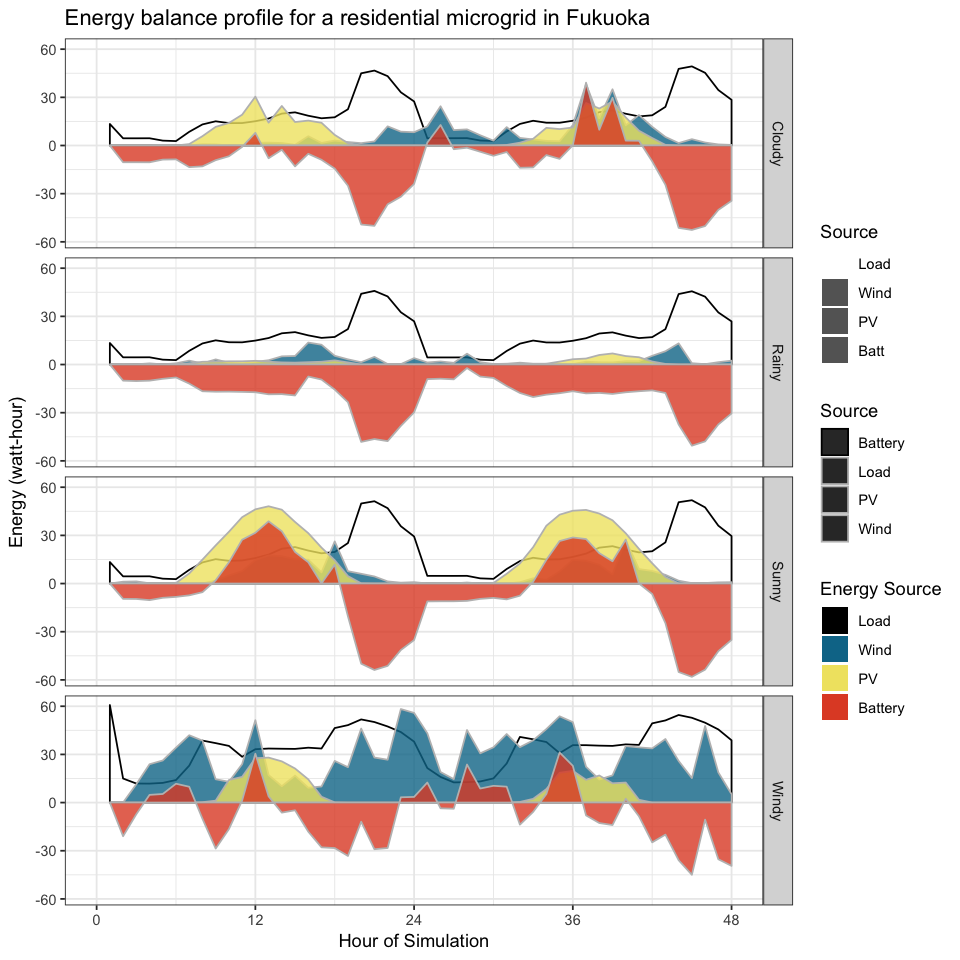

In [104]:
options(repr.plot.width=8, repr.plot.height=8)


a1= ggplot(fukl, aes(x=Hr, y= Value,alpha= Source, colour= Source, fill=Source)) + 
#ggplot(fukl, aes(x=Hr, y= Value, alpha= Source, colour= Source)) + 
    geom_area(position= 'identity')+
    scale_alpha_manual(values = c(0,0.8 ,0.8, 0.8))+
    scale_fill_manual(values = c("black","#067697","#F0E470","#E14E2D"  ), 
                               labels = c("Load","Wind", "PV", "Battery"))+


    # scale_fill_manual(values = c("#E14E2D", "black", "#F0E470",
    #                           "#067697"), labels = c("Battery","Load", "PV", "Wind"))+
    scale_colour_manual(values = c("black", "grey", "grey",
                               "grey"), labels = c("Battery","Load", "PV", "Wind"))+
    scale_x_continuous(limits=c(0,48),breaks = c(0,12, 24, 36, 48))+
     facet_grid(Weather~. )+
    ylab('Energy (watt-hour)') +
    xlab('Hour of Simulation') +
    theme_bw()+
    guides(fill=guide_legend(title="Energy Source"))+
    ggtitle('Energy balance profile for a residential microgrid in Fukuoka')

a1

In [11]:
fuk2<- read.csv("Exp_data_fuk_3.csv")

head(fuk2)


fuk2l <- gather(fuk2, Source, Value, PV:Load)
head(fuk2l)

Hr,PV,Wind,Battery.Charge,Battery.Discharge,Load,City,Weather
1,0,0.0000,0.0000,0.0000,60.7566,Fukuoka,Windy
2,0,0.0040,0.0000,20.9576,14.9876,Fukuoka,Windy
3,0,11.4106,0.0000,7.2501,11.8716,Fukuoka,Windy
4,0,23.8844,4.8005,0.0000,11.8132,Fukuoka,Windy
5,0,26.2239,5.3558,0.0000,12.2640,Fukuoka,Windy
6,0,34.2094,11.7518,0.0000,14.0574,Fukuoka,Windy


Hr,City,Weather,Source,Value
1,Fukuoka,Windy,PV,0
2,Fukuoka,Windy,PV,0
3,Fukuoka,Windy,PV,0
4,Fukuoka,Windy,PV,0
5,Fukuoka,Windy,PV,0
6,Fukuoka,Windy,PV,0


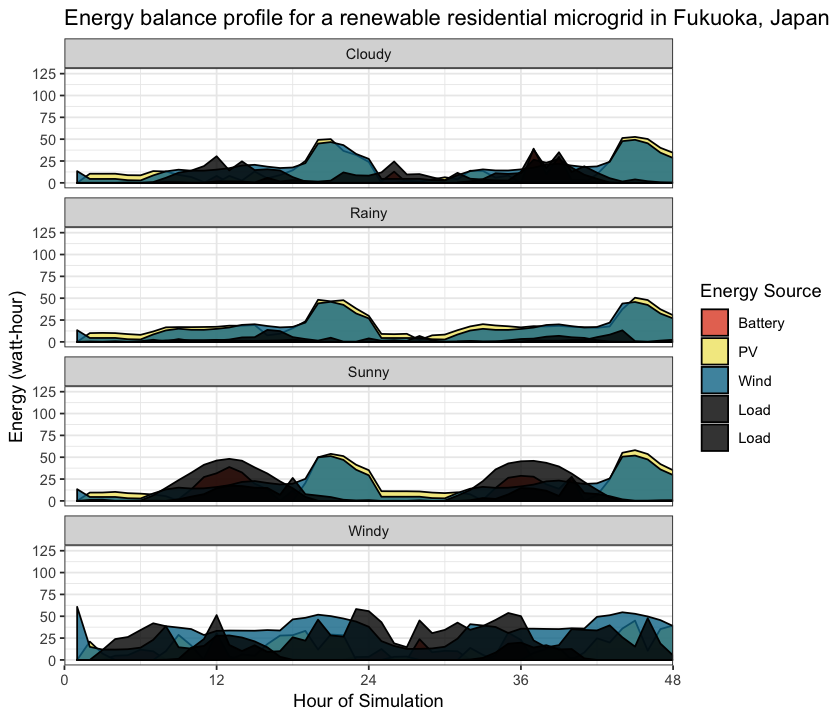

In [92]:
options(repr.plot.width=7, repr.plot.height=6)

a1= ggplot(fuk2l, aes(x=Hr, y= Value, fill= Source)) + 
    geom_area(color= 'black',  position = 'identity', alpha= 0.8)+
     scale_fill_manual(values = c("#E14E2D", "#F0E470",
                               "#067697", "black", "black"), labels = c("Battery", "PV", "Wind", 'Load', 'Load'))+
    scale_x_continuous(limits=c(0,48),breaks = c(0,12, 24, 36, 48), expand = c(0,0))+
    scale_y_continuous(limits=c(0,125),breaks = c(0,25, 50, 75, 100, 125))+
   # stat_summary(fun.y = sum, na.rm = TRUE, color = 'black', geom ='line')+
    # facet_grid(Weather~., switch= 'y')+
    facet_wrap(~ Weather, ncol = 1) + 
    #facet_grid(~monthnum , switch = "x") +
    theme_bw()+
    ylab('Energy (watt-hour)') +
    xlab('Hour of Simulation') +
    guides(fill=guide_legend(title="Energy Source"))+
    ggtitle('Energy balance profile for a renewable residential microgrid in Fukuoka, Japan')

a1



In [105]:
#ggsave("fukuokaload.pdf", a1, useDingbats = TRUE, width = 7,   height = 6)

In [ ]:
a2= a1+ theme(
    #legend.position="left", 
strip.text.x = element_text(size = 10),
    strip.background = element_blank(),
    panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
 # plot.background = element_blank(),
    #strip.background = element_rect(element_text(size = 8, colour="black", fill="#CCCCFF"),
    # Background of the entire plot
  
  #panel.background = element_blank(),   # Background of plotting area
 # panel.border = element_blank(),       # Border around plotting area.
                                       # fill argument should be NA
  
  #panel.grid = element_blank(), 
    # All grid lines
  
  #panel.grid.major.x = element_blank(), # Vertical major grid lines
  #panel.grid.major.y = element_blank(), # Horizontal major grid lines
  #panel.grid.minor.x = element_blank(), # Vertical minor grid lines
  #panel.grid.minor.y = element_blank(), 
    axis.text.x=element_blank(),
      axis.ticks.x=element_blank(),
      axis.text.y=element_blank(),
      axis.ticks.y=element_blank(), 
    #axis.title.x = element_blank(),
    #axis.title.y = element_blank()
)
a2

In [67]:
all<- read.csv("Energy_intensity_all_cities.csv")
head(all)

alli <- gather(all, Source, Value, PV:Wind)
head(alli)

#intensity in Wh/W 

City,Weather,PV,Battery,Wind
Seattle,Cloudy,1.371291,8.324500,0.0000000
Seattle,Windy,1.994647,9.602336,0.1687392
Seattle,Sunny,11.767958,3.406967,0.0000000
Seattle,Rainy,3.613209,7.443932,0.0000000
Fukuoka,Sunny,14.706306,5.553272,2.6495840
Fukuoka,Rainy,1.167950,7.846653,1.2562790


City,Weather,Source,Value
Seattle,Cloudy,PV,1.371291
Seattle,Windy,PV,1.994647
Seattle,Sunny,PV,11.767958
Seattle,Rainy,PV,3.613209
Fukuoka,Sunny,PV,14.706306
Fukuoka,Rainy,PV,1.167950


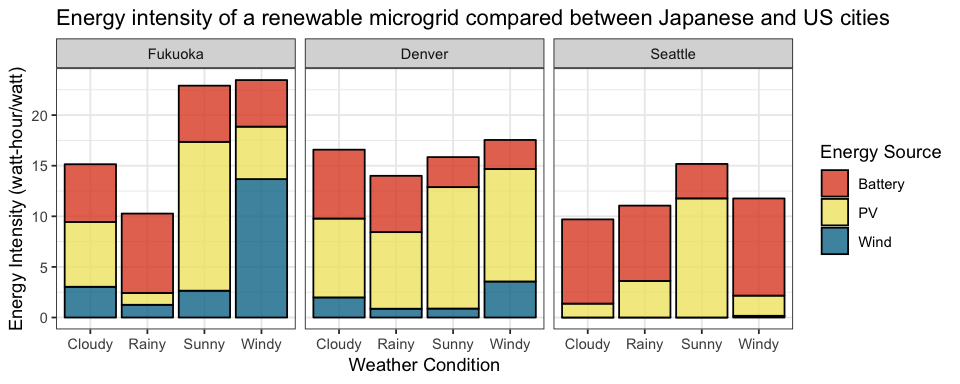

In [111]:
options(repr.plot.width=8, repr.plot.height=3.2)

alli$City <- reorder(alli$City, alli$Value, function(x) -max(x) )

all_int= ggplot(alli, aes(x = Weather, y= Value,  fill = Source)) + 
    geom_bar(stat = "identity", colour='black', alpha= 0.8)+ 
    facet_wrap(~ City, ncol = 3) +
    scale_fill_manual(values = c("#E14E2D", "#F0E470",
                               "#067697"), labels = c("Battery", "PV", "Wind"))+
    guides(fill=guide_legend(title="Energy Source"))+
    xlab('Weather Condition')+
    ylab('Energy Intensity (watt-hour/watt)')+
    theme_bw()+
    ggtitle('Energy intensity of a renewable microgrid compared between Japanese and US cities')


all_int

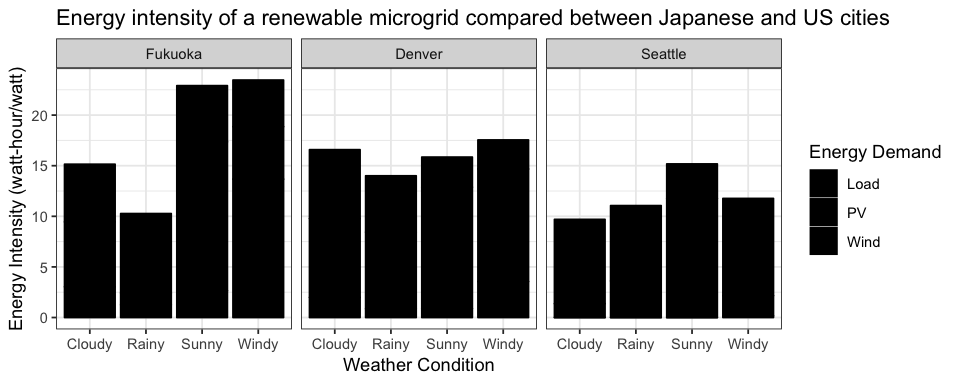

In [114]:
options(repr.plot.width=8, repr.plot.height=3.2)

alli$City <- reorder(alli$City, alli$Value, function(x) -max(x) )

all_int2= ggplot(alli, aes(x = Weather, y= Value,  fill = Source)) + 
    geom_bar(stat = "identity", colour='black', alpha= 1)+ 
    facet_wrap(~ City, ncol = 3) +
    scale_fill_manual(values = c("black", "black",
                               "Black"), labels = c("Load", "PV", "Wind"))+
    guides(fill=guide_legend(title="Energy Demand"))+
    xlab('Weather Condition')+
    ylab('Energy Intensity (watt-hour/watt)')+
    theme_bw()+
    ggtitle('Energy intensity of a renewable microgrid compared between Japanese and US cities')


all_int2

In [116]:
ggsave("all_inten.pdf", all_int, useDingbats = TRUE, width = 8.5,   height = 3)